In [1]:

import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
from skimage.io import imread

In [19]:
# root = "/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_ASU/"
# root = "/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_CWRU_Dupont/"
# root = "/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_CWRU_SunEdison/"
root = "/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/"

masks_root_path = root + "ann/"
images_root_path = root + "img/"

# image_file_extension = "tiff"
image_file_extension = "jpg"

In [20]:
category_mapping = {0: "empty", 1: "dark", 2: "busbar", 3: "crack", 4: "non-cell"}

def inference_and_show(img, gt_mask):
    fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(10, 10), layout='compressed')

    ax[0, 0].imshow(img, cmap='gray', interpolation='None')
    ax[0, 0].axis('off')
    ax[0, 0].set_title('(a) EL image', fontsize='xx-large')
    ##
    for i in range(5):
        ax[1, i].imshow(gt_mask[i], cmap='viridis', interpolation='None')
        ax[1, i].axis('off')
        ax[1, i].set_title(f'({i}) {category_mapping[i]} activation')

---

## flip, rotate, mirror

In [21]:
def flip_my_mask(mask, flip_dir):
    channels = []
    for c in range(mask.shape[0]):
        channel = mask[c]
        flipped_channel = np.flip(channel, flip_dir)
        channels.append(flipped_channel)
    flipped_mask = np.stack(channels, axis=0)
    return flipped_mask

In [22]:
mask_load_path = masks_root_path + "channeled/"

for mask_name in [c for c in os.listdir(mask_load_path)]:
    mask_path = mask_load_path + mask_name
    loaded_mask = np.load(mask_path, allow_pickle=True)
    
    # mask_name
    np.save(masks_root_path + 'all/' + mask_name, loaded_mask)
    
    # mirror_y
    mirror_y = flip_my_mask(loaded_mask, 1)
    np.save(masks_root_path + 'all/my_' + mask_name, mirror_y)
    np.save(masks_root_path + '/mirrored_y/my_' + mask_name, mirror_y)
    
    # mirror_x
    mirror_x = flip_my_mask(loaded_mask, 0)
    np.save(masks_root_path + 'all/mx_' + mask_name, mirror_x)
    np.save(masks_root_path + '/mirrored_x/mx_' + mask_name, mirror_x)

    # mirror_xy
    mirror_xy = flip_my_mask(mirror_x, 1)
    np.save(masks_root_path + 'all/mxy_' + mask_name, mirror_xy)
    np.save(masks_root_path + '/mirrored_xy/mxy_' + mask_name, mirror_xy)

In [23]:
image_load_path = images_root_path + "original/"
    
for img_name in [c for c in os.listdir(image_load_path)]:

    # load_path/ + '1207 - asdasd.jpg' or 'xyz.jpg'
    img_path = image_load_path + img_name

    if os.path.isdir(img_path):
        continue
    
    loaded_img = cv2.imread(img_path)

    # img_name
    cv2.imwrite(images_root_path + 'all/' + img_name, loaded_img)

    # mirror_y
    mirror_y = np.flip(loaded_img, 1)
    cv2.imwrite(images_root_path + 'all/my_' + img_name, mirror_y)
    cv2.imwrite(images_root_path + '/mirrored_y/my_' + img_name, mirror_y)

    # mirror_x
    mirror_x = np.flip(loaded_img, 0)
    cv2.imwrite(images_root_path + 'all/mx_' + img_name, mirror_x)
    cv2.imwrite(images_root_path + '/mirrored_x/mx_' + img_name, mirror_x)

    # mirror_xy
    mirror_xy = np.flip(mirror_x, 1)
    cv2.imwrite(images_root_path + 'all/mxy_' + img_name, mirror_xy)
    cv2.imwrite(images_root_path + '/mirrored_xy/mxy_' + img_name, mirror_xy)

---

# split 

In [24]:
masks_root_path = root + "ann/all/"
images_root_path = root + "img/all/"

In [25]:
masks = [c for c in os.listdir(masks_root_path)]
img_files = [c for c in os.listdir(images_root_path)]

masks_train_set, masks_val_set = train_test_split(masks, random_state=42, shuffle=False)
img_train_set, img_val_set = train_test_split(img_files, random_state=42, shuffle=False)

In [26]:
img_train_dir = root + "img/train/"
img_val_dir = root + "img/val/"

ann_train_dir = root + "ann/train/"
ann_val_dir = root + "ann/val/"

In [27]:
for mask in masks_train_set:
    loaded_mask = np.load(masks_root_path + mask)
    np.save(ann_train_dir + mask, loaded_mask)
    
    name = mask[0:-4]
    name += "." + image_file_extension
    img = cv2.imread(images_root_path + name)
    cv2.imwrite(img_train_dir + name, img)
    
for mask in masks_val_set:
    loaded_mask = np.load(masks_root_path + mask)
    np.save(ann_val_dir + mask, loaded_mask)
    
    name = mask[0:-4]
    name += "." + image_file_extension
    img = cv2.imread(images_root_path + name)
    cv2.imwrite(img_val_dir + name, img)

# confirmation

after rotation and flipping, ensure that all channels of masks were rotated too

/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/ann/all/my_0634.npy
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/img/all/my_0634.jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/ann/all/mx_0634.npy
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/img/all/mx_0634.jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/ann/all/mxy_0634.npy
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/img/all/mxy_0634.jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/ann/all/my_0026.npy
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/img/all/my_0026.jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/ann/all/mx_0026.npy
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/img/all/mx_0026.jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/ann/all/mxy_0026.npy
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_LBNL/img/all/mxy_0026.jpg
/Users/ojas/Desktop/saj/SANDIA/pvcra

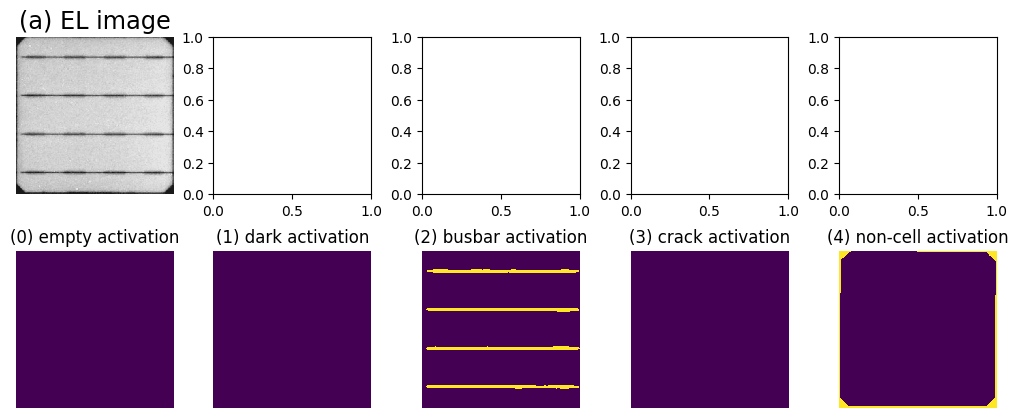

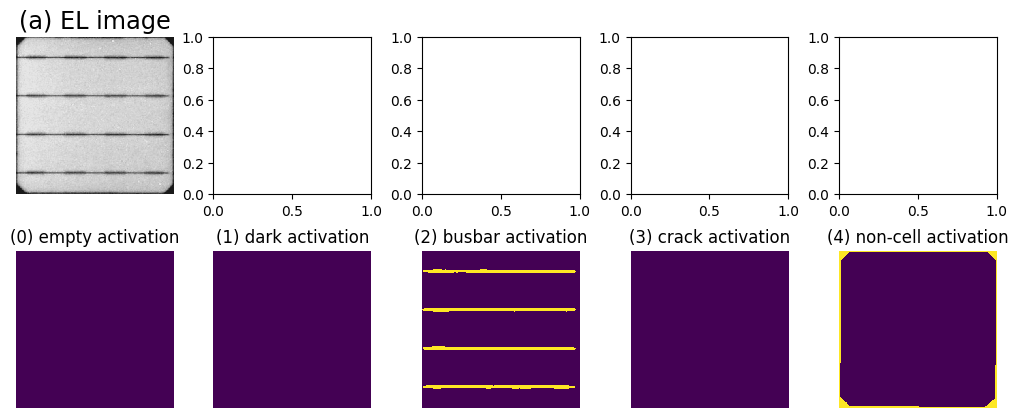

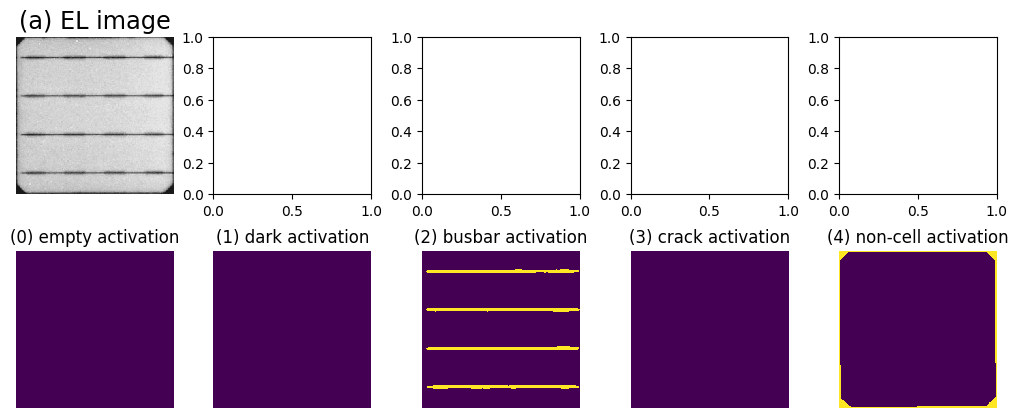

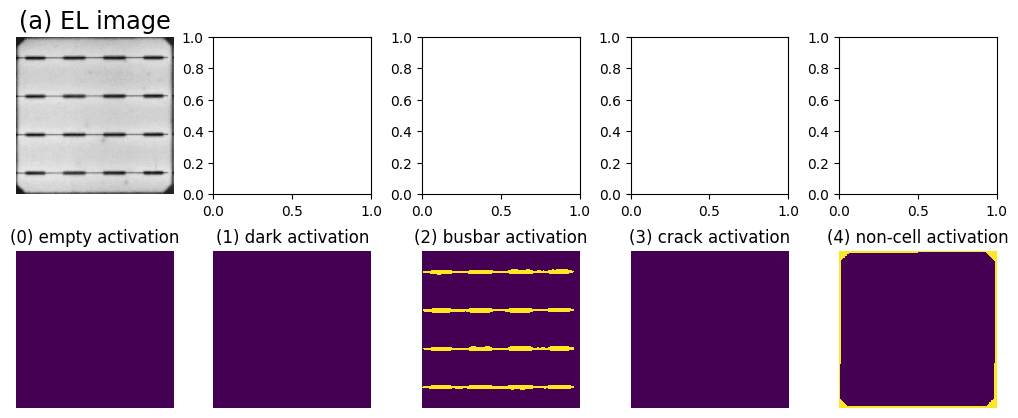

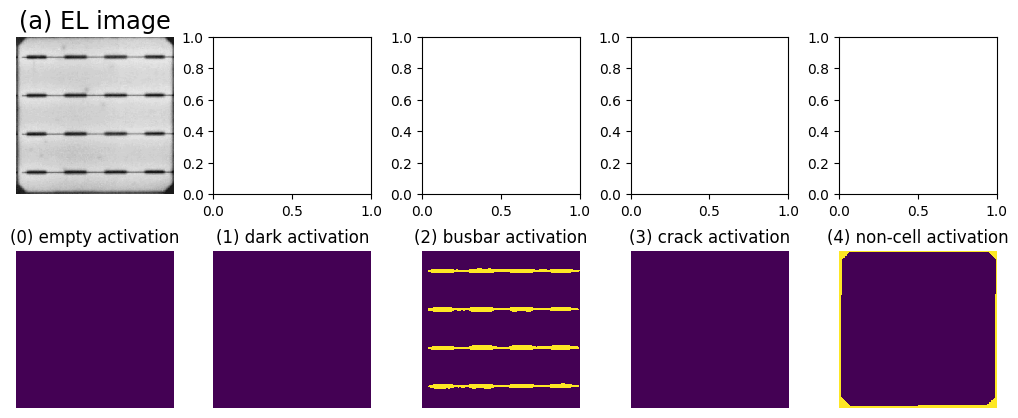

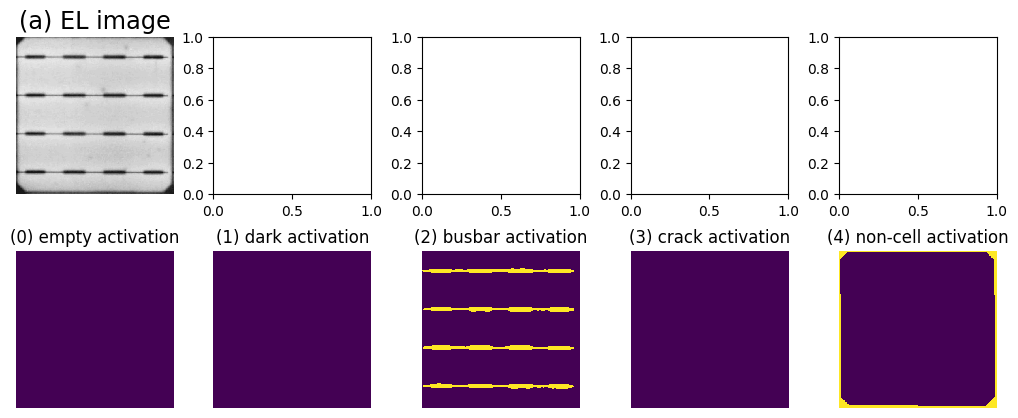

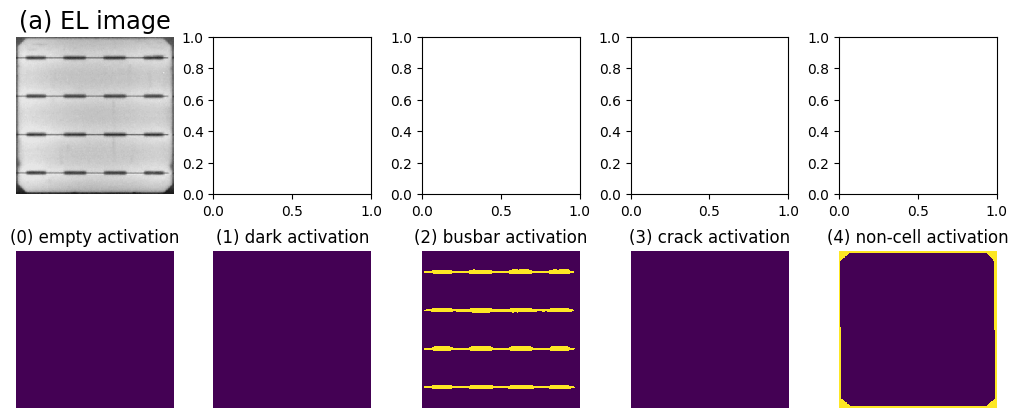

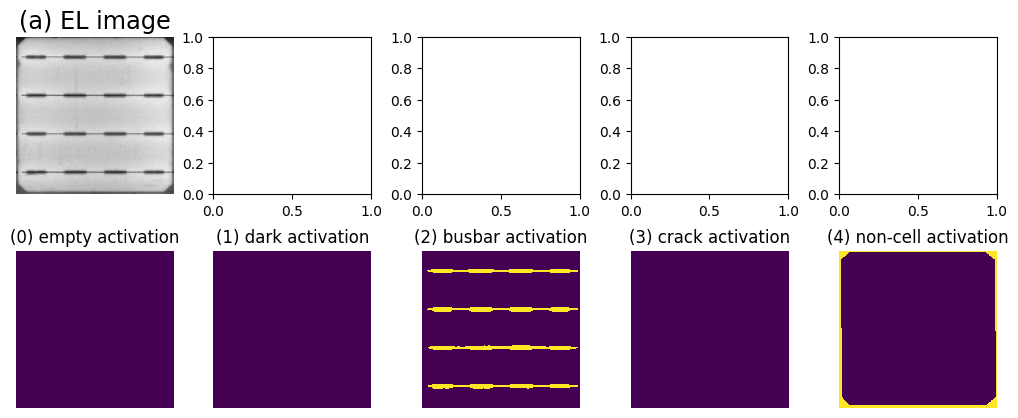

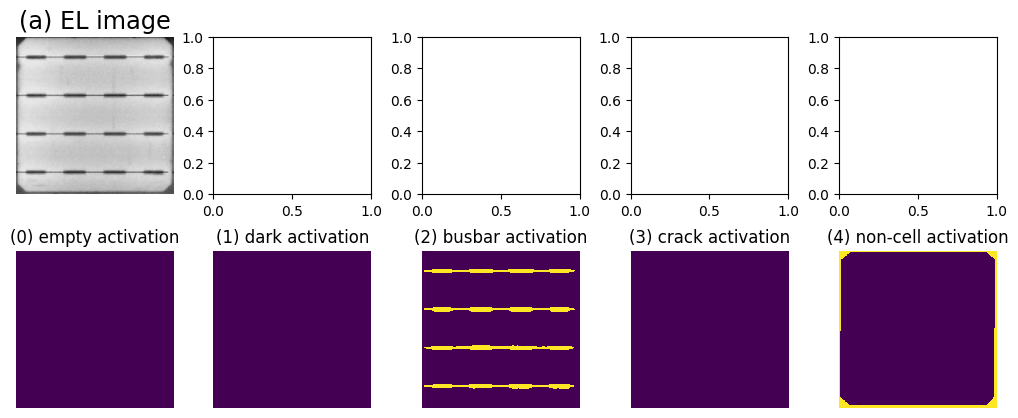

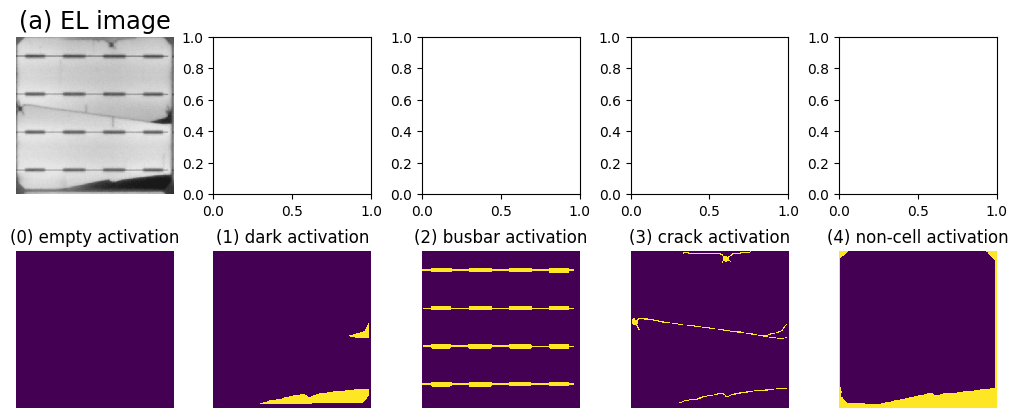

In [28]:
img_folder = root + 'img/all/'
mask_folder = root + 'ann/all/'

files = [c for c in os.listdir(mask_folder)]

npy_regex_string = r"^(.*?)(?=\.npy)"

n_masks = [re.search(npy_regex_string, f).group(1) for f in files]

raw_mask_names = []
custom_mask_list = []

for mask_name in n_masks:
    if not mask_name.startswith("m"):
        raw_mask_names.append(mask_name)

for raw_mask_name in raw_mask_names:
    for additive in ["my_", "mx_", "mxy_"]:
        custom_mask_name = f"{additive}{raw_mask_name}"
        custom_mask_list.append(custom_mask_name)

for this_mask in custom_mask_list[0:10]:
    mask_path = os.path.join(mask_folder, f'{this_mask}.npy')
    img_path = os.path.join(img_folder, f'{this_mask}.{image_file_extension}')
    
    print(mask_path)
    print(img_path)

    image = imread(img_path, plugin="pil")
    loaded_mask = np.load(mask_path, allow_pickle=True)

    inference_and_show(image, loaded_mask)